In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
bike_df=pd.read_csv("../datasets/bike_train.csv")
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [49]:
bike_df['datetime']= bike_df.datetime.apply(pd.to_datetime)

bike_df['year']= bike_df.datetime.apply(lambda x: x.year)
bike_df['month']= bike_df.datetime.apply(lambda x: x.month)
bike_df['day']= bike_df.datetime.apply(lambda x: x.day)
bike_df['hour']= bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [54]:
drop_columns= ['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log값 변환시 NaN등의 이슈로 log() 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y,pred):
    log_y =np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred) ** 2
    rmsle= np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()을 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE,RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE는 scikeit learn의 mean_absolute_error()로 계산
    mae_val= mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso

y_traget =bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_features,y_traget, test_size=0.3, random_state=0)

# 선형 회귀 적용 --> 학습/예측/평가
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)


RMSLE: 1.165, RMSE:140.900, MAE:105.924


C:\Users\dgh06\AppData\Local\Temp\ipykernel_21816\633252581.py:6: RuntimeWarning: invalid value encountered in log1p
  log_pred=np.log1p(pred)


In [58]:
def get_top_error_data(y_test,pred,n_tops=5):
    # 데이터프레임에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교할 수 있도록 생성
    result_df= pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']= np.abs(result_df['real_count'] -result_df['predicted_count'] )
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

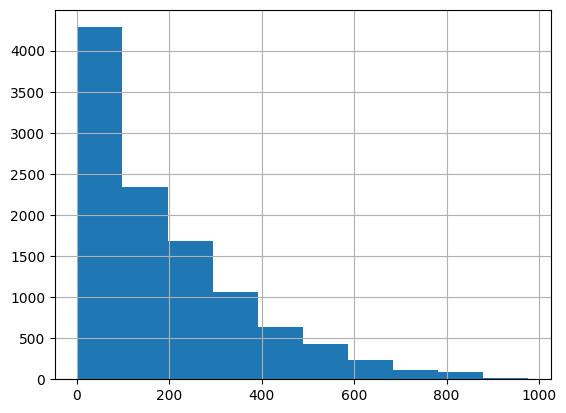

In [68]:
y_traget.hist()

<Axes: >

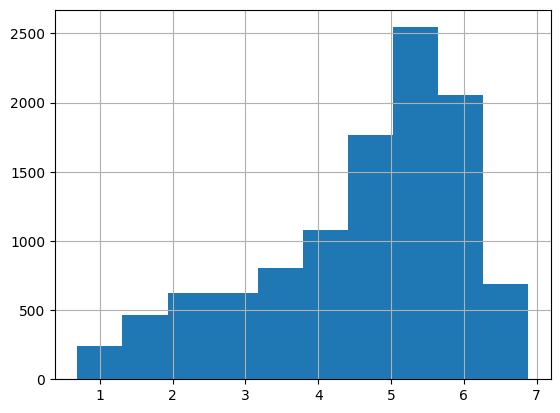

In [69]:
y_log_transform=np.log1p(y_traget)
y_log_transform.hist()

In [67]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(y_traget)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE:162.594, MAE:109.286
